In [89]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from matplotlib.colors import ListedColormap
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import root_mean_squared_error, r2_score

### 1. Получите и загрузите данные.

### 1. Получите и загрузите данные.

In [90]:
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

In [91]:
data = pd.DataFrame(data=X, columns=california_housing.feature_names)
data['MedHouseVal'] = y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3. Проверка данных на наличие пропусков и их удаление

In [92]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [94]:
data.duplicated().sum()

0

В данном случае пропусков нет, поэтому нет необходимости в их удалении.

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [98]:
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [99]:
print("RMSE на обучающем множестве:", rmse_train)
print("RMSE на тестовом множестве:", rmse_test)
print("R2 на обучающем множестве:", r2_train)
print("R2 на тестовом множестве:", r2_test)

RMSE на обучающем множестве: 0.7196757085831575
RMSE на тестовом множестве: 0.7455813830127749
R2 на обучающем множестве: 0.6125511913966952
R2 на тестовом множестве: 0.5757877060324524


### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

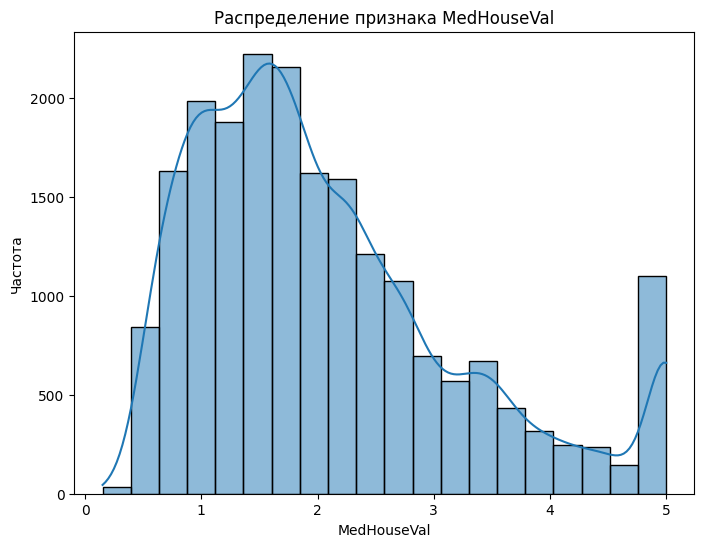

In [100]:
plt.figure(figsize=(8, 6))
sns.histplot(data['MedHouseVal'], bins=20, kde=True)
plt.title("Распределение признака MedHouseVal")
plt.xlabel("MedHouseVal")
plt.ylabel("Частота")
plt.show()

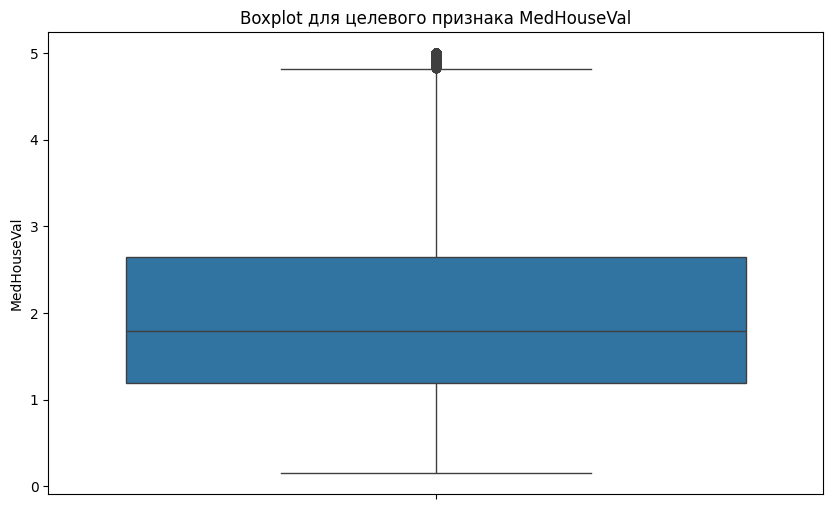

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['MedHouseVal'])
plt.title("Boxplot для целевого признака MedHouseVal")
plt.show()

Вывод: выбросы присутствуют.

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
- Сделайте выводы.
- Удалите признаки на основании полученных значений, выводов.
- Повторите п. 3, п. 4 на измененных данных.

In [102]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

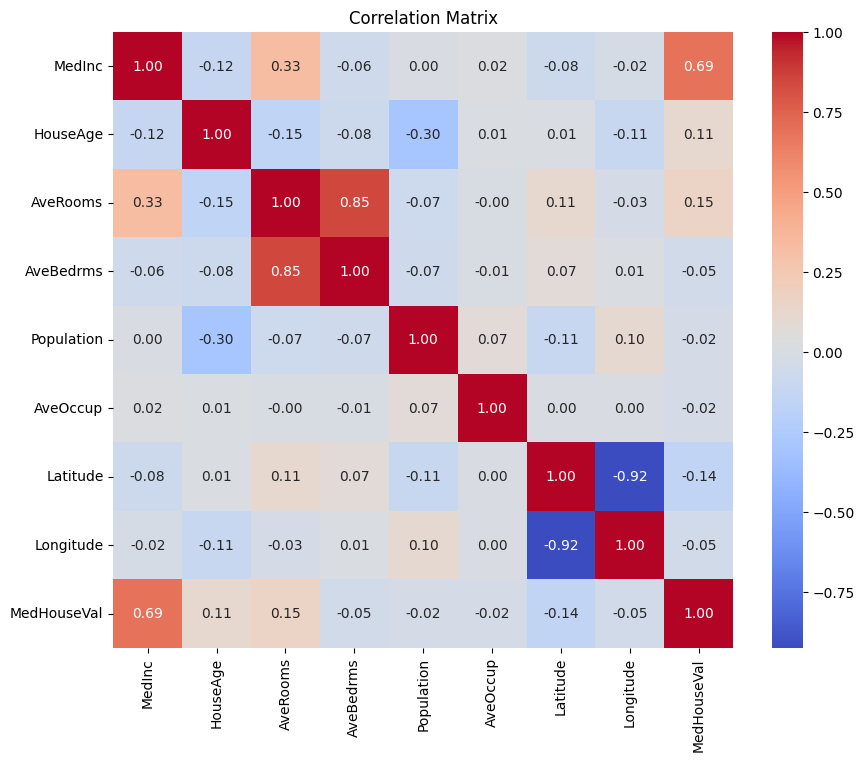

In [103]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [104]:
new_data = data.drop(columns=['AveBedrms', 'Population'])
X = new_data.drop(columns=['MedHouseVal'])
y = new_data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("RMSE на обучающем множестве:", rmse_train)
print("RMSE на тестовом множестве:", rmse_test)
print("R2 на обучающем множестве:", r2_train)
print("R2 на тестовом множестве:", r2_test)

RMSE на обучающем множестве: 0.731681227571958
RMSE на тестовом множестве: 0.7398294501935632
R2 на обучающем множестве: 0.5995166482669017
R2 на тестовом множестве: 0.5823077951522642


- Удаляем признак AveBedrms в связи с тем, что присутствует мультиколлинеарность с признаком AveRooms. Почему не удаляем AveRooms - более точный признак, описывающий характеристику квартиры/дома.
- Удаляем признак Population, от него не зависит ценообразование квартиры/дома.

Вывод: удаление признаков почти никак не изменило качество модели.

### 7. Исследуйте оставленные признаки на выбросы.
- Удалите выбросы в случае обнаружения.
- Повторите п. 3, п. 4 на измененных данных.

In [105]:
new_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude',
       'MedHouseVal'],
      dtype='object')

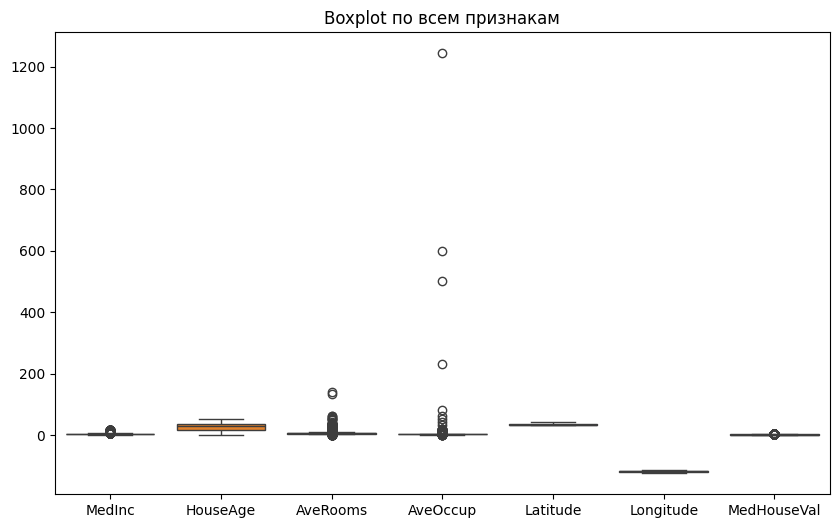

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']])
plt.title("Boxplot по всем признакам")
plt.show()

In [107]:
new_data.shape

(20640, 7)

In [108]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1

data_no_outliers = new_data[~((new_data < (Q1 - 1.5 * IQR)) | (new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [109]:
data_no_outliers.shape

(18288, 7)

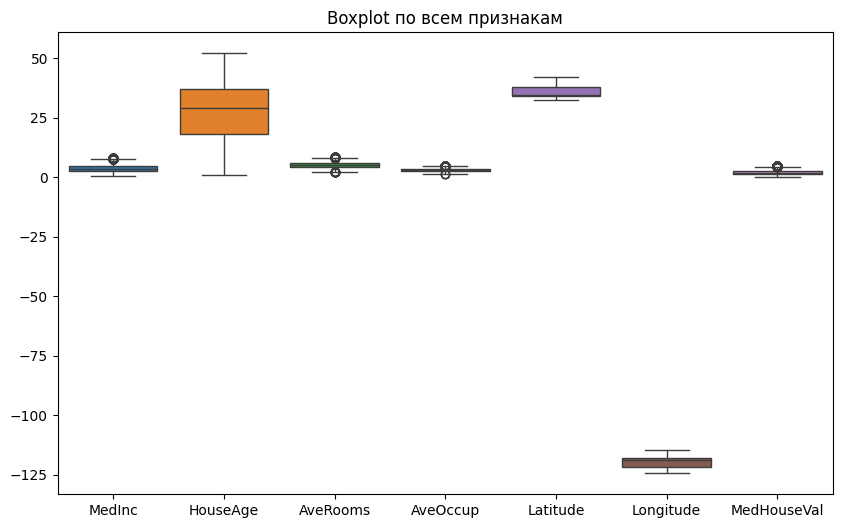

In [110]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_no_outliers[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']])
plt.title("Boxplot по всем признакам")
plt.show()

In [111]:
X = data_no_outliers.drop(columns=['MedHouseVal'])
y = data_no_outliers['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test_out = root_mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test_out = r2_score(y_test, y_test_pred)
print("RMSE на обучающем множестве:", rmse_train)
print("RMSE на тестовом множестве:", rmse_test_out)
print("R2 на обучающем множестве:", r2_train)
print("R2 на тестовом множестве:", r2_test_out)

RMSE на обучающем множестве: 0.5744800358959636
RMSE на тестовом множестве: 0.5864531324394914
R2 на обучающем множестве: 0.6274725439014112
R2 на тестовом множестве: 0.6031615108645769


### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
- Повторите п. 3, п. 4 на измененных данных.

In [112]:
data_no_outliers

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
2,7.2574,52.0,8.288136,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,2.128405,37.84,-122.25,2.992
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,2.123209,39.43,-121.32,0.847


In [113]:
data_log = data_no_outliers.copy()
cols = data_log.columns.drop(['MedHouseVal', 'Longitude', 'Latitude'])
data_log[cols] = np.log1p(data_log[cols])
data_log['Latitude'] = np.radians(data_log['Latitude'])
data_log['Longitude'] = np.radians(data_log['Longitude'])

In [114]:
data_log

,MedInc,HouseAge,AveRooms,AveOccup,Latitude,Longitude,MedHouseVal
2,2.111110,3.970292,2.228738,1.335596,0.660607,-2.133490,3.521
3,1.893579,3.970292,1.919471,1.266369,0.660607,-2.133665,3.413
4,1.578195,3.970292,1.985385,1.157342,0.660607,-2.133665,3.422
5,1.616771,3.970292,1.751225,1.144190,0.660607,-2.133665,2.697
6,1.538822,3.970292,1.780346,1.140523,0.660433,-2.133665,2.992
...,...,...,...,...,...,...,...
20635,0.940124,3.258097,1.799307,1.269931,0.689056,-2.113419,0.781
20636,1.268861,2.944439,1.962070,1.416534,0.689231,-2.115514,0.771
20637,0.993252,2.890372,1.825443,1.201661,0.688183,-2.115688,0.923
20638,1.053336,2.944439,1.845223,1.138861,0.688183,-2.117433,0.847


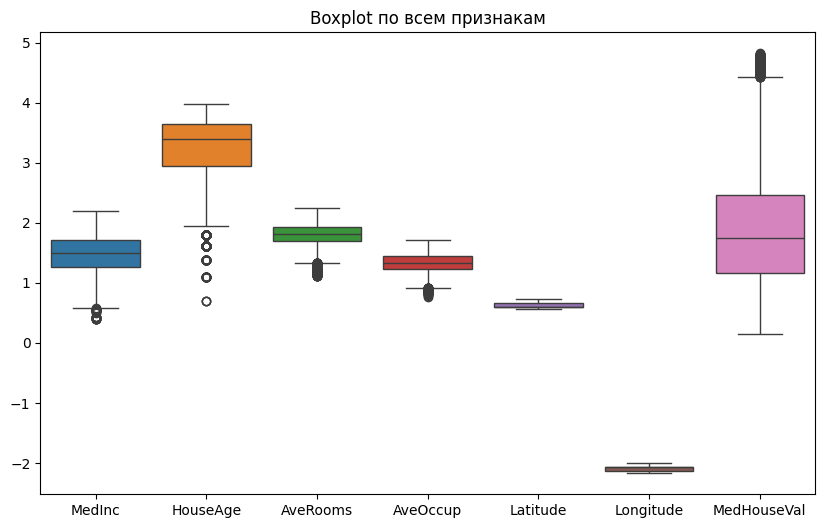

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_log[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']])
plt.title("Boxplot по всем признакам")
plt.show()

In [116]:
X = data_log.drop(columns=['MedHouseVal'])
y = data_log['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test_mat = root_mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test_mat = r2_score(y_test, y_test_pred)
print("RMSE на обучающем множестве:", rmse_train)
print("RMSE на тестовом множестве:", rmse_test_mat)
print("R2 на обучающем множестве:", r2_train)
print("R2 на тестовом множестве:", r2_test_mat)

RMSE на обучающем множестве: 0.59210471410869
RMSE на тестовом множестве: 0.6002802313657076
R2 на обучающем множестве: 0.6042641067393603
R2 на тестовом множестве: 0.5842279897143803


### 10. Сформулируйте выводы по проделанной работе.
- Кратко опишите какие преобразования были сделаны с данными.
- Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
- Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

- Избавились от выбросов, убрали мультиколлениарные признаки, математически преобразовали данные.
- *ТАБЛИЦА НИЖЕ*
- В целом, для бейзлайна - неплохо, можно усложить модель, а также более "умно" избавиться от выбросов.

In [118]:
data = {
    'Model': ['Без преобразований', 'Без выбросов', 'С математическим преобразованием'],
    'RMSE': [rmse_test, rmse_test_out, rmse_test_mat],
    'R2': [r2_test, r2_test_out, r2_test_mat]
}

In [119]:
metrics_df = pd.DataFrame(data)
metrics_df

,Model,RMSE,R2
0,Без преобразований,0.739829,0.582308
1,Без выбросов,0.586453,0.603162
2,С математическим преобразованием,0.600280,0.584228
